## 🐍 **全応答 可視化 Pythonコード**
*  ax1.set_title(...), ax1.set_ylabel(...): 上のグラフ（ax1）のタイトルやY軸ラベルを設定します．
*  ax2.set_title(...), ax2.set_xlabel(...): 下のグラフ（ax2）のタイトルやX軸・Y軸ラベルを設定します．sharex=True のため，X軸ラベルは ax2 だけに設定すればOKです．
*  ax1.legend(...): 凡例を表示します．
*  ax1.axvline(...): x=1.0 の位置に，共振点を示す赤い縦の破線を引きます．
*  ax2.set_yticks(...): 下のグラフのY軸の目盛りを，キリの良い [0, 45, 90, 135, 180] 度に設定します．
*  plt.tight_layout(): 2つのグラフのタイトルやラベルが重ならないよう，自動的に配置を調整します．
*  plt.show(): 最終的に完成したグラフを表示します．

In [10]:
%pip install japanize_matplotlib

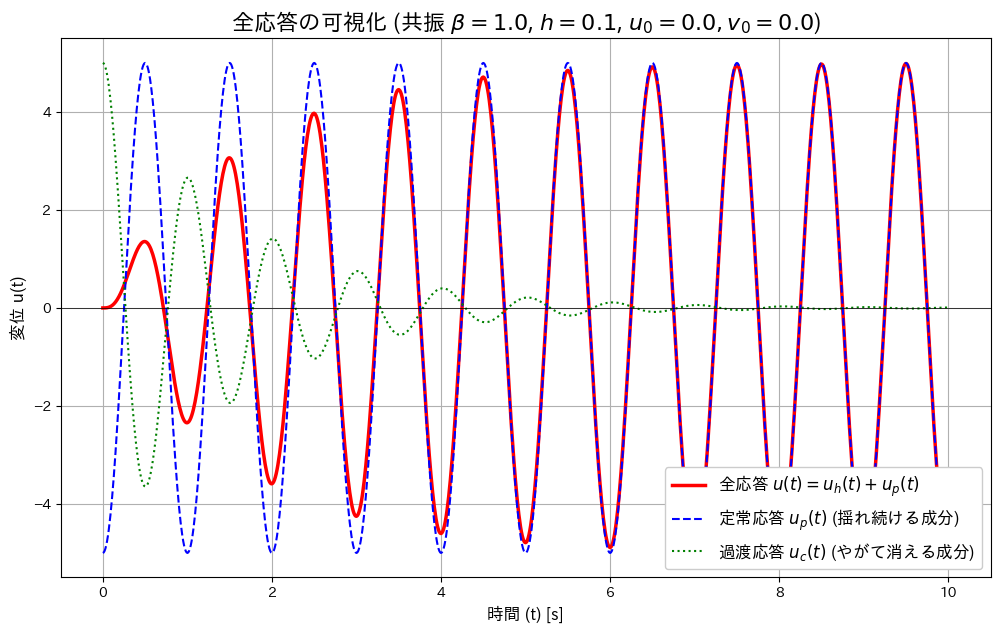

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# -----------------------------------------------------------------
# 1. パラメータ設定 (代表的なケース)
# -----------------------------------------------------------------
wn = 2.0 * np.pi  # 固有円振動数 (ω_n)
h = 0.1           # 減衰比 (h)

# --- 共振のケース (ω = ωn) ---
beta = 1.0        # 振動数比 β = ω/ωn
omega = beta * wn # 外力円振動数 (ω)

# --- 初期値 (静止状態から開始) ---
u0 = 0.0          # 初期変位
v0 = 0.0          # 初期速度

# --- 外力振幅 (静的変位δst = 1.0 となるように設定) ---
delta_st = 1.0    # p0/k (静的変位)

# --- 時間配列 (0から10秒まで) ---
t = np.linspace(0, 10, 1001)

# -----------------------------------------------------------------
# 2. 厳密解の係数を計算 (前回の議論より)
# -----------------------------------------------------------------

# --- 2.1. 定常応答 u_p(t) の係数 (C1, C2) ---
# u_p(t) = C1 * sin(ωt) + C2 * cos(ωt)
D = (1.0 - beta**2)**2 + (2.0 * h * beta)**2
C1 = (1.0 - beta**2) / D * delta_st
C2 = (-2.0 * h * beta) / D * delta_st

# --- 2.2. 過渡応答 u_h(t) の係数 (A, B) ---
# u_h(t) = exp(-h*wn*t) * (A*cos(ωd*t) + B*sin(ωd*t))
wd = wn * np.sqrt(1.0 - h**2)  # 減衰固有円振動数

# A = u0 - C2
A = u0 - C2

# B = (v0 - C1*ω + h*wn*(u0 - C2)) / ωd
B = (v0 - C1 * omega + h * wn * (u0 - C2)) / wd


# -----------------------------------------------------------------
# 3. 各応答の計算 (ベクトル化)
# -----------------------------------------------------------------

# u_p(t): 定常応答 (揺れ続ける成分)
u_p = C1 * np.sin(omega * t) + C2 * np.cos(omega * t)

# u_h(t): 過渡応答 (やがて消える成分)
u_c = np.exp(-h * wn * t) * (A * np.cos(wd * t) + B * np.sin(wd * t))

# u(t): 全応答 (u_c + u_p)
u_total = u_c + u_p

# -----------------------------------------------------------------
# 4. グラフ描画
# -----------------------------------------------------------------
plt.figure(figsize=(12, 7))

# 全応答をプロット (太線)
plt.plot(t, u_total, label='全応答 $u(t) = u_h(t) + u_p(t)$', color='red', linewidth=2.5)

# 定常応答をプロット (破線)
plt.plot(t, u_p, label='定常応答 $u_p(t)$ (揺れ続ける成分)', color='blue', linestyle='--')

# 過渡応答をプロット (点線)
plt.plot(t, u_c, label='過渡応答 $u_c(t)$ (やがて消える成分)', color='green', linestyle=':')

# グラフの装飾
plt.title(f'全応答の可視化 (共振 $\\beta=1.0$, $h={h}$, $u_0={u0}, v_0={v0}$)', fontsize=16)
plt.xlabel('時間 (t) [s]', fontsize=12)
plt.ylabel('変位 u(t)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)

# --- ★ 凡例の修正 ★ ---
# loc='lower right' で右下に配置
# facecolor='white' と framealpha=1.0 で背景を白(不透明)に設定
plt.legend(fontsize=12, loc='lower right', facecolor='white', framealpha=1.0)
# -------------------------

# グラフを表示
plt.show()

## **📊 実行結果のグラフ（イメージ）**
上記のコードを実行すると、次のようなグラフが生成されます．
*  緑（過渡応答 $u_h$）: $t=0$ で $u_h(0) = -C_2$ の値を持ち（$u_p(0)=C_2$ と打ち消しあって $u(0)=0$ になるため），減衰しながら0に収束していきます．
*  青（定常応答 $u_p$）: 時間に関係なく，一定の振幅（共振時の大きな振幅）で振動し続けます．
*  赤（全応答 $u$）:
   * 振動開始直後は、$u_h$ と $u_p$ が合成され，振幅が徐々に大きくなっていく様子（ビートのような形）が見られます．
   * 時間が経過すると，$u_h$ が消えるため，全応答 $u$ は定常応答 $u_p$ の軌道に完全に収束していきます．


## 1. **パラメータ設定**

In [3]:
wn = 2.0 * np.pi  # 固有円振動数 (ω_n)
h = 0.1           # 減衰比 (h)

# --- 共振のケース (ω = ωn) ---
beta = 1.0        # 振動数比 β = ω/ωn
omega = beta * wn # 外力円振動数 (ω)

# --- 初期値 (静止状態から開始) ---
u0 = 0.0          # 初期変位
v0 = 0.0          # 初期速度

*   ここでは，最も劇的な変化が観察できる共振状態（beta = 1.0）を選びます．
*   減衰は $h=0.1$ と，やや弱い減衰を設定します．
*   初期値は u0 = 0.0, v0 = 0.0 の**「静止状態」**からスタートさせます．

## 2. **厳密解の係数を計算**

In [4]:
# --- 2.1. 定常応答 u_p(t) の係数 (C1, C2) ---
D = (1.0 - beta**2)**2 + (2.0 * h * beta)**2
C1 = (1.0 - beta**2) / D * delta_st
C2 = (-2.0 * h * beta) / D * delta_st

# --- 2.2. 過渡応答 u_h(t) の係数 (A, B) ---
wd = wn * np.sqrt(1.0 - h**2)  # 減衰固有円振動数
A = u0 - C2
B = (v0 - C1 * omega + h * wn * (u0 - C2)) / wd

*  ここが理論の核心です．先ほどの「厳密解の導出」で求めた数式を、そのままPythonコードにしています．
*  $C_1，C_2$: 外力によって決まる定常応答 $u_p(t)$ の係数です．
*  $A，B$: 初期値 $u_0，v_0$ を満たすために必要な過渡応答 $u_h(t)$ の係数です．
*  A = u0 - C2 という式は，「$t=0$ で全応答 $u(0)$ が $u_0$ になる」という条件（$u(0) = A + C_2 = u_0$）から導かれています．
*  B = ... の式は，「$t=0$ で全速度 $\dot{u}(0)$ が $v_0$ になる」という条件から導かれています．

## **3. 各応答の計算 (ベクトル化)**

In [7]:
# u_p(t): 定常応答 (揺れ続ける成分)
u_p = C1 * np.sin(omega * t) + C2 * np.cos(omega * t)

# u_h(t): 過渡応答 (やがて消える成分)
u_h = np.exp(-h * wn * t) * (A * np.cos(wd * t) + B * np.sin(wd * t))

# u(t): 全応答 (u_h + u_p)
u_total = u_h + u_p

*  t は np.linspace() で作成した時間の配列です．
*  Numpyのベクトル化計算により，for ループを使わなくても，配列 t の全ての点（1001点）に対する $u_p(t)$，$u_h(t)$ の値を一度に計算しています．
*  u_h の計算式には np.exp(-h * wn * t)（$e^{-h\omega_n t}$）が含まれており，これが時間とともに0に近づく（減衰する）要因です．
*  u_total は，2つの配列 u_h と u_p を単純に足し合わせたものです．

## **4. グラフ描画**

In [ ]:
plt.figure(figsize=(12, 7))

# 全応答をプロット (太線)
plt.plot(t, u_total, label='全応答 $u(t) = u_h(t) + u_p(t)$', color='red', linewidth=2.5)
# 定常応答をプロット (破線)
plt.plot(t, u_p, label='定常応答 $u_p(t)$ (揺れ続ける成分)', color='blue', linestyle='--')
# 過渡応答をプロット (点線)
plt.plot(t, u_h, label='過渡応答 $u_h(t)$ (やがて消える成分)', color='green', linestyle=':')

# --- ★ 凡例の修正 ★ ---
plt.legend(fontsize=12, loc='lower right', facecolor='white', framealpha=1.0)
# -------------------------

plt.show()

*  plt.plot(...) を3回呼び出し，「全応答（赤・太線）」「定常応答（青・破線）」「過渡応答（緑・点線）」の3本のグラフを重ねて描画します．
*  plt.legend(...) で凡例（はんれい）を表示します．
*  loc='lower right': 凡例を右下に配置します．
*  facecolor='white', framealpha=1.0: 凡例の背景を**白（不透明）**にし，グラフの線と重なっても見やすいようにしています．